<a href="https://colab.research.google.com/github/xslittlemaggie/Deep-Learning-Projects/blob/master/MNIST_CNN_%E5%9F%BA%E6%9C%AC%E6%A8%A1%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, adam, RMSprop

from keras.utils import np_utils
from keras import backend as K

# visualization
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
# the data, split between train and test sets
if K.image_data_format() == "channels_first":
  x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
  x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
  input_shape = (1, 28, 28)
else:
  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
  input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_train = x_train/255
#x_test = x_test/255

# convert class vectors to binary class matrics
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))

# 第二层：激活层
model.add(Activation("sigmoid"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))


# 将图片拉平
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'mse', optimizer = adam(), metrics = ["accuracy"]) # categorical_crossentropy

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_0 = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.0872 - acc: 0.3657 - val_loss: 0.0797 - val_acc: 0.4022
Epoch 2/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.0801 - acc: 0.4015 - val_loss: 0.0786 - val_acc: 0.4074
Epoch 3/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.0791 - acc: 0.4046 - val_loss: 0.0779 - val_acc: 0.4093
Epoch 4/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0786 - acc: 0.4059 - val_loss: 0.0776 - val_acc: 0.4098
Epoch 5/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0786 - acc: 0.4063 - val_loss: 0.0780 - val_acc: 0.4085
Epoch 6/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0782 - acc: 0.4071 - val_loss: 0.0772 - val_acc: 0.4105
Epoch 7/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.0783 - acc: 0.4075 - val_loss: 0.0782 - val_acc

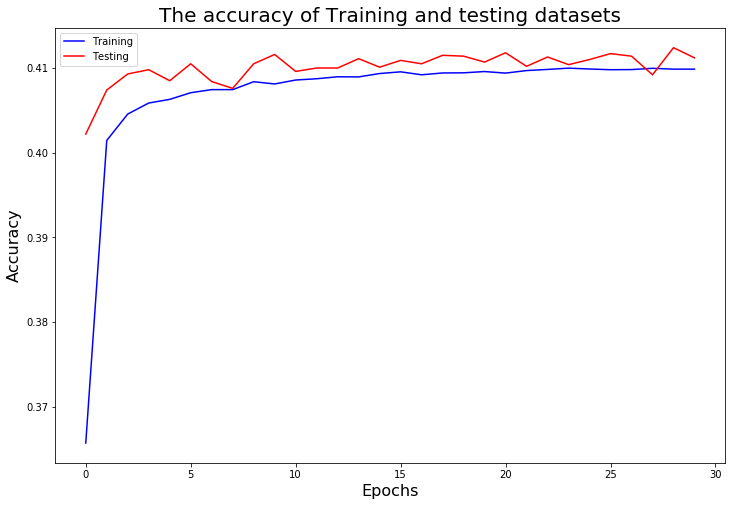

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(history_0.history["acc"], color = "b")
plt.plot(history_0.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

# 参数调节

## 调参 1. 数据归一化

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))

# 第二层：激活层
model.add(Activation("sigmoid"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))

# 将图片拉平
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'mse', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_1 = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0812 - acc: 0.3742 - val_loss: 0.0618 - val_acc: 0.5541
Epoch 2/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0625 - acc: 0.5470 - val_loss: 0.0629 - val_acc: 0.5482
Epoch 3/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.0606 - acc: 0.5555 - val_loss: 0.0613 - val_acc: 0.5526
Epoch 4/30
60000/60000 [==============================] - 4s 65us/step - loss: 0.0594 - acc: 0.5614 - val_loss: 0.0576 - val_acc: 0.5740
Epoch 5/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.0584 - acc: 0.5654 - val_loss: 0.0561 - val_acc: 0.5789
Epoch 6/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0575 - acc: 0.5704 - val_loss: 0.0567 - val_acc: 0.5750
Epoch 7/30
60000/60000 [==============================] - 4s 65us/step - loss: 0.0566 - acc: 0.5741 - val_loss: 0.0558 - val_acc

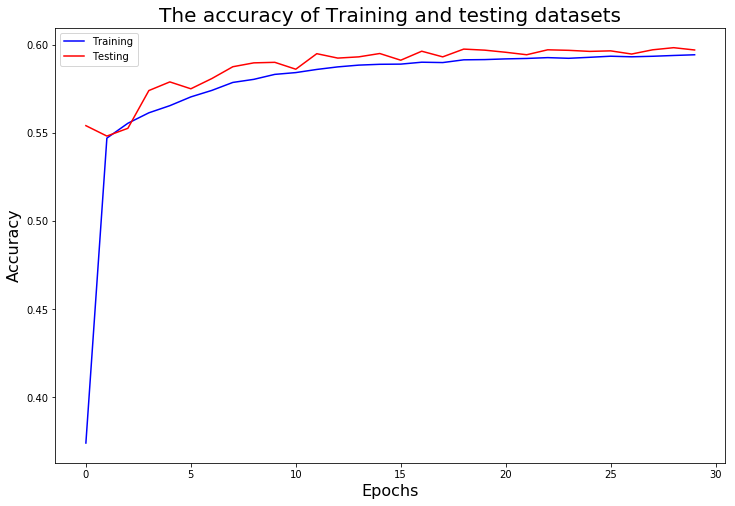

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(history_1.history["acc"], color = "b")
plt.plot(history_1.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 2. 增加网络的深度

In [0]:
model = Sequential()

for i in range(10):

  # 第一层: CNN
  model.add(Conv2D(32, kernel_size = (3, 3), padding = "SAME", input_shape = (28, 28, 1)))

  # 第二层：激活层
  model.add(Activation("sigmoid"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))

# 将图片拉平
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'mse', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_45 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_46 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_47 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 28, 28, 32)      

In [0]:
history_2 = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 30s 498us/step - loss: 0.0940 - acc: 0.1071 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 2/30
60000/60000 [==============================] - 29s 490us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 3/30
60000/60000 [==============================] - 29s 489us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 4/30
60000/60000 [==============================] - 30s 496us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 5/30
60000/60000 [==============================] - 30s 498us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 6/30
60000/60000 [==============================] - 29s 487us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 7/30
60000/60000 [==============================] - 29s 490us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.

In [0]:
max(history_2.history["val_acc"])

0.1135

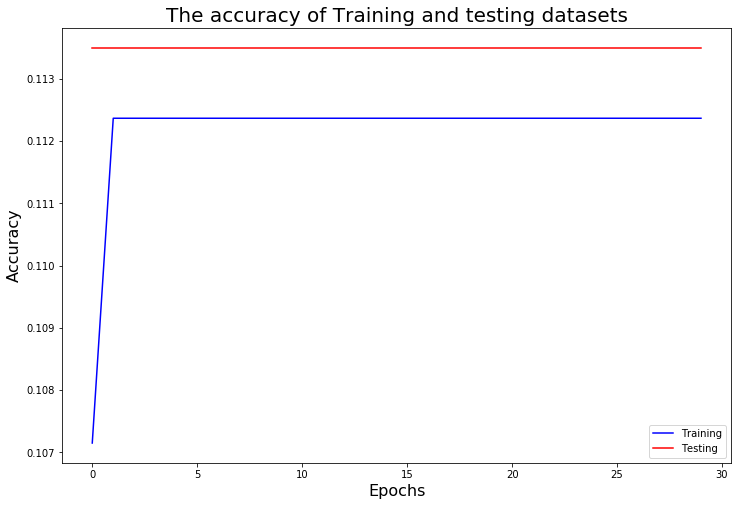

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(history_2.history["acc"], color = "b")
plt.plot(history_2.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 3: 激励函数 

In [0]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))

# 第二层：激活层
model.add(Activation("relu"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))

# 将图片拉平
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'mse', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_56 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_3 = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 76us/step - loss: 0.0160 - acc: 0.8984 - val_loss: 0.0079 - val_acc: 0.9503
Epoch 2/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.0066 - acc: 0.9599 - val_loss: 0.0049 - val_acc: 0.9699
Epoch 3/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.0045 - acc: 0.9738 - val_loss: 0.0040 - val_acc: 0.9751
Epoch 4/30
60000/60000 [==============================] - 4s 65us/step - loss: 0.0035 - acc: 0.9792 - val_loss: 0.0033 - val_acc: 0.9796
Epoch 5/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0030 - acc: 0.9822 - val_loss: 0.0031 - val_acc: 0.9815
Epoch 6/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.0026 - acc: 0.9843 - val_loss: 0.0032 - val_acc: 0.9800
Epoch 7/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.0023 - acc: 0.9865 - val_loss: 0.0028 - val_acc

In [0]:
max(history_3.history["val_acc"])

0.985

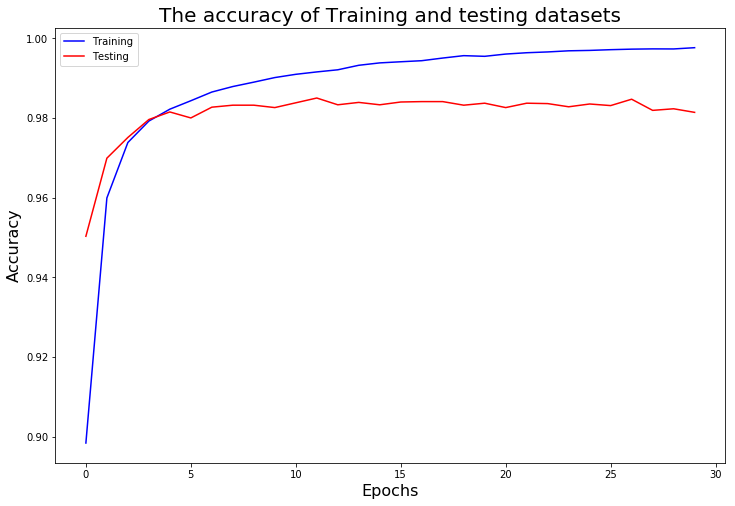

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(history_3.history["acc"], color = "b")
plt.plot(history_3.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 4: 目标函数

In [0]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))

# 第二层：激活层
model.add(Activation("relu"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))

# 将图片拉平
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_57 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_4 = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.1599 - acc: 0.9559 - val_loss: 0.1102 - val_acc: 0.9701
Epoch 2/30
60000/60000 [==============================] - 4s 69us/step - loss: 0.0973 - acc: 0.9728 - val_loss: 0.0791 - val_acc: 0.9771
Epoch 3/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.0756 - acc: 0.9784 - val_loss: 0.0718 - val_acc: 0.9769
Epoch 4/30
60000/60000 [==============================] - 4s 69us/step - loss: 0.0638 - acc: 0.9819 - val_loss: 0.0689 - val_acc: 0.9791
Epoch 5/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0566 - acc: 0.9835 - val_loss: 0.0591 - val_acc: 0.9810
Epoch 6/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.0514 - acc: 0.9848 - val_loss: 0.0609 - val_acc: 0.9806
Epoch 7/30
60000/60000 [==============================] - 4s 68us/step - loss: 0.0460 - acc: 0.9872 - val_loss: 0.0530 - val_acc

In [0]:
max(history_4.history["val_acc"])

0.9841

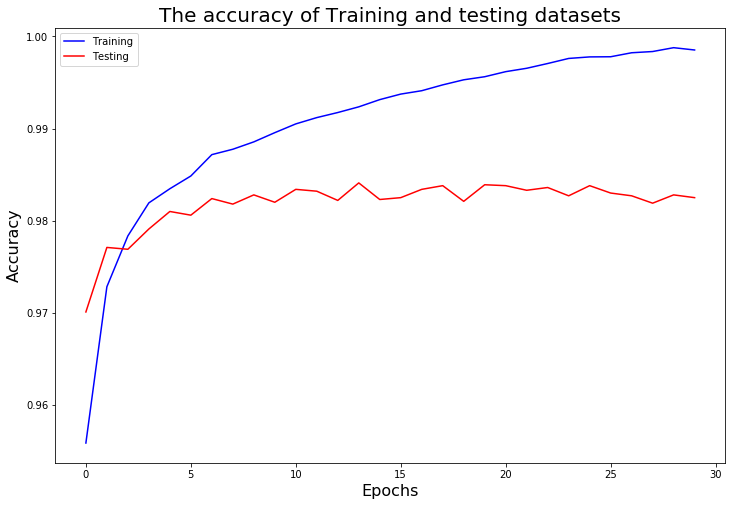

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(history_4.history["acc"], color = "b")
plt.plot(history_4.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 5: 优化函数

In [0]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))

# 第二层：激活层
model.add(Activation("relu"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))

# 将图片拉平
model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = adam(), metrics = ["accuracy"])
model.summary()

In [0]:
history_5 = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(history_5.history["acc"], color = "b")
plt.plot(history_5.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 6: 批归一化（BN）

In [0]:
from keras.layers.normalization import BatchNormalization

model = Sequential()

# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))
model.add(BatchNormalization())
# 第二层：激活层
model.add(Activation("relu"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))

# 将图片拉平
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = adam(), metrics = ["accuracy"])
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_58 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 5408)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 5408)              21632     
_________________________________________________________________
dense_11 (Dense)             (None, 10)             

In [0]:
history_6 = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 127us/step - loss: 0.1868 - acc: 0.9447 - val_loss: 0.0969 - val_acc: 0.9713
Epoch 2/30
60000/60000 [==============================] - 7s 109us/step - loss: 0.0745 - acc: 0.9781 - val_loss: 0.0890 - val_acc: 0.9770
Epoch 3/30
60000/60000 [==============================] - 6s 108us/step - loss: 0.0553 - acc: 0.9830 - val_loss: 0.0943 - val_acc: 0.9730
Epoch 4/30
60000/60000 [==============================] - 7s 109us/step - loss: 0.0423 - acc: 0.9872 - val_loss: 0.0858 - val_acc: 0.9774
Epoch 5/30
60000/60000 [==============================] - 6s 107us/step - loss: 0.0348 - acc: 0.9885 - val_loss: 0.0967 - val_acc: 0.9765
Epoch 6/30
60000/60000 [==============================] - 6s 108us/step - loss: 0.0275 - acc: 0.9911 - val_loss: 0.0902 - val_acc: 0.9778
Epoch 7/30
60000/60000 [==============================] - 7s 108us/step - loss: 0.0244 - acc: 0.9918 - val_loss: 0.1158 - 

In [0]:
max(history_6.history["val_acc"])

0.9824

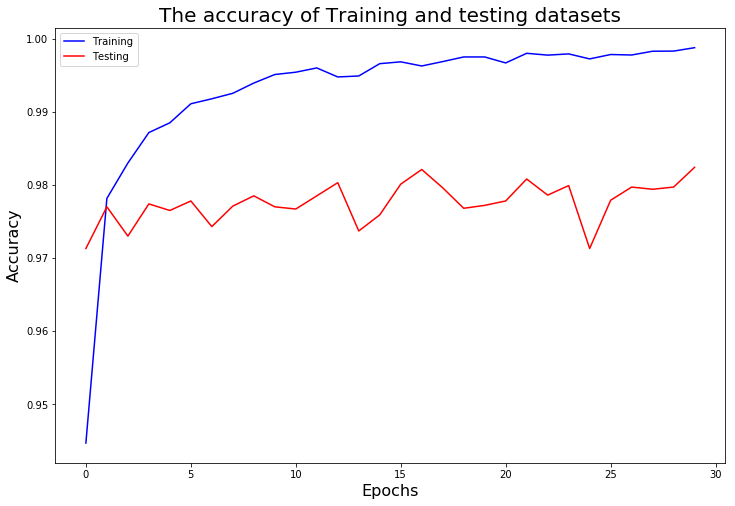

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(history_6.history["acc"], color = "b")
plt.plot(history_6.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 7：Dropout

In [0]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1)))
model.add(BatchNormalization())
# 第二层：激活层
model.add(Activation("relu"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))

# 将图片拉平
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_60 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 5408)              0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 5408)            

In [0]:
history_7 = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.2923 - acc: 0.9123 - val_loss: 0.1099 - val_acc: 0.9685
Epoch 2/30
60000/60000 [==============================] - 7s 113us/step - loss: 0.1248 - acc: 0.9623 - val_loss: 0.0776 - val_acc: 0.9785
Epoch 3/30
60000/60000 [==============================] - 7s 113us/step - loss: 0.0977 - acc: 0.9711 - val_loss: 0.0783 - val_acc: 0.9779
Epoch 4/30
60000/60000 [==============================] - 7s 113us/step - loss: 0.0906 - acc: 0.9717 - val_loss: 0.0819 - val_acc: 0.9778
Epoch 5/30
60000/60000 [==============================] - 7s 112us/step - loss: 0.0794 - acc: 0.9760 - val_loss: 0.0811 - val_acc: 0.9787
Epoch 6/30
60000/60000 [==============================] - 7s 113us/step - loss: 0.0814 - acc: 0.9749 - val_loss: 0.0711 - val_acc: 0.9817
Epoch 7/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.0755 - acc: 0.9769 - val_loss: 0.0741 - 

In [0]:
max(history_7.history["val_acc"])

0.9861

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(history_7.history["acc"], color = "b")
plt.plot(history_7.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 8_1： 卷积核个数， 大小

In [0]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(64, kernel_size = (3, 3), input_shape = (28, 28, 1)))
model.add(BatchNormalization())
# 第二层：激活层
model.add(Activation("relu"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))

# 将图片拉平
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
activation_61 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 10816)             0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 10816)           

In [0]:
history_8_1 = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 158us/step - loss: 0.2459 - acc: 0.9291 - val_loss: 0.0921 - val_acc: 0.9727
Epoch 2/30
60000/60000 [==============================] - 8s 134us/step - loss: 0.1275 - acc: 0.9639 - val_loss: 0.1003 - val_acc: 0.9746
Epoch 3/30
60000/60000 [==============================] - 8s 132us/step - loss: 0.1083 - acc: 0.9704 - val_loss: 0.0919 - val_acc: 0.9771
Epoch 4/30
60000/60000 [==============================] - 8s 132us/step - loss: 0.0978 - acc: 0.9741 - val_loss: 0.0905 - val_acc: 0.9787
Epoch 5/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0919 - acc: 0.9761 - val_loss: 0.0904 - val_acc: 0.9814
Epoch 6/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0879 - acc: 0.9783 - val_loss: 0.0950 - val_acc: 0.9802
Epoch 7/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0819 - acc: 0.9795 - val_loss: 0.0994 - 

In [0]:
max(history_8_1.history["val_acc"])

0.9854

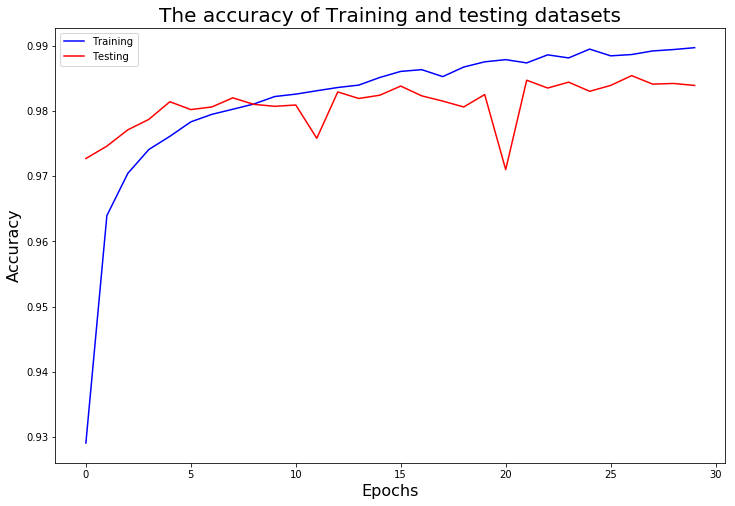

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(history_8_1.history["acc"], color = "b")
plt.plot(history_8_1.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 8_2： 卷积核个数， 大小, 更深

In [0]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(64, kernel_size = (3, 3), input_shape = (28, 28, 1)))
model.add(BatchNormalization())
# 第二层：激活层
model.add(Activation("relu"))

# 第一层: CNN
model.add(Conv2D(64, kernel_size = (3, 3)))
model.add(BatchNormalization())
# 第二层：激活层
model.add(Activation("relu"))

# 第二层：激活层
# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3)))
model.add(BatchNormalization())


# 第二层：激活层
model.add(Activation("relu"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))

# 将图片拉平
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
activation_62 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_63 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 22, 22, 32)      

In [0]:
history_8_2 = model.fit(x_train, y_train, 
                   batch_size = 128, 
                   epochs = 30,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 19s 321us/step - loss: 0.1927 - acc: 0.9404 - val_loss: 0.0630 - val_acc: 0.9803
Epoch 2/30
60000/60000 [==============================] - 17s 282us/step - loss: 0.0718 - acc: 0.9775 - val_loss: 0.0467 - val_acc: 0.9840
Epoch 3/30
60000/60000 [==============================] - 17s 283us/step - loss: 0.0642 - acc: 0.9817 - val_loss: 0.0404 - val_acc: 0.9876
Epoch 4/30
60000/60000 [==============================] - 17s 283us/step - loss: 0.0585 - acc: 0.9830 - val_loss: 0.0411 - val_acc: 0.9880
Epoch 5/30
60000/60000 [==============================] - 17s 285us/step - loss: 0.0527 - acc: 0.9839 - val_loss: 0.0419 - val_acc: 0.9885
Epoch 6/30
60000/60000 [==============================] - 17s 283us/step - loss: 0.0496 - acc: 0.9856 - val_loss: 0.0517 - val_acc: 0.9857
Epoch 7/30
60000/60000 [==============================] - 17s 283us/step - loss: 0.0478 - acc: 0.9858 - val_loss: 0.

In [0]:
max(history_8_2.history["val_acc"])

0.9925

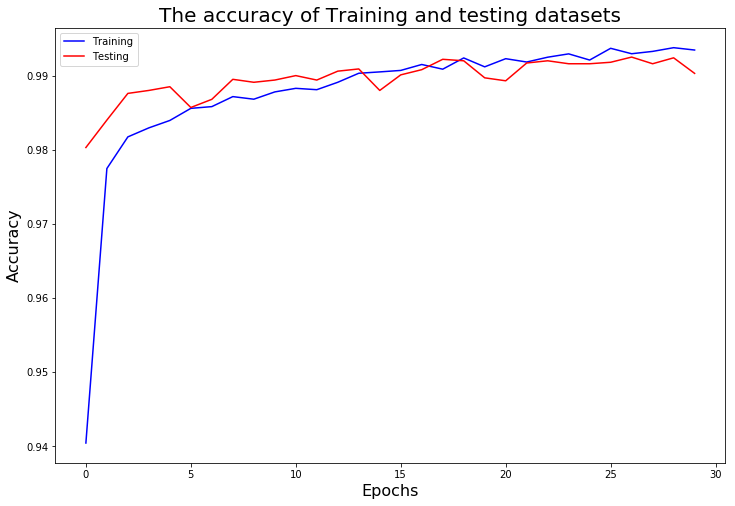

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(history_8_2.history["acc"], color = "b")
plt.plot(history_8_2.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets", size = 20)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 9： batch size

In [0]:
model = Sequential()

# 第一层: CNN
model.add(Conv2D(64, kernel_size = (3, 3), input_shape = (28, 28, 1)))
model.add(BatchNormalization())
# 第二层：激活层
model.add(Activation("relu"))

# 第一层: CNN
model.add(Conv2D(64, kernel_size = (3, 3)))
model.add(BatchNormalization())
# 第二层：激活层
model.add(Activation("relu"))

# 第二层：激活层
# 第一层: CNN
model.add(Conv2D(32, kernel_size = (3, 3)))
model.add(BatchNormalization())


# 第二层：激活层
model.add(Activation("relu"))

# 第三层：池化层
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))

# 将图片拉平
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = adam(), metrics = ["accuracy"])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
activation_65 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_66 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 22, 22, 32)      

In [0]:
history_9 = model.fit(x_train, y_train, 
                   batch_size = 64, 
                   epochs = 20,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 396us/step - loss: 0.1195 - acc: 0.9638 - val_loss: 0.0772 - val_acc: 0.9758
Epoch 2/20
60000/60000 [==============================] - 23s 386us/step - loss: 0.0872 - acc: 0.9749 - val_loss: 0.0548 - val_acc: 0.9825
Epoch 3/20
60000/60000 [==============================] - 23s 386us/step - loss: 0.0829 - acc: 0.9771 - val_loss: 0.0605 - val_acc: 0.9836
Epoch 4/20
60000/60000 [==============================] - 23s 387us/step - loss: 0.0791 - acc: 0.9788 - val_loss: 0.0543 - val_acc: 0.9855
Epoch 5/20
60000/60000 [==============================] - 23s 388us/step - loss: 0.0763 - acc: 0.9807 - val_loss: 0.0453 - val_acc: 0.9869
Epoch 6/20
60000/60000 [==============================] - 23s 387us/step - loss: 0.0707 - acc: 0.9818 - val_loss: 0.0516 - val_acc: 0.9877
Epoch 7/20
60000/60000 [==============================] - 23s 386us/step - loss: 0.0681 - acc: 0.9831 - val_loss: 0.

In [0]:
max(history_9.history["val_acc"])

0.991

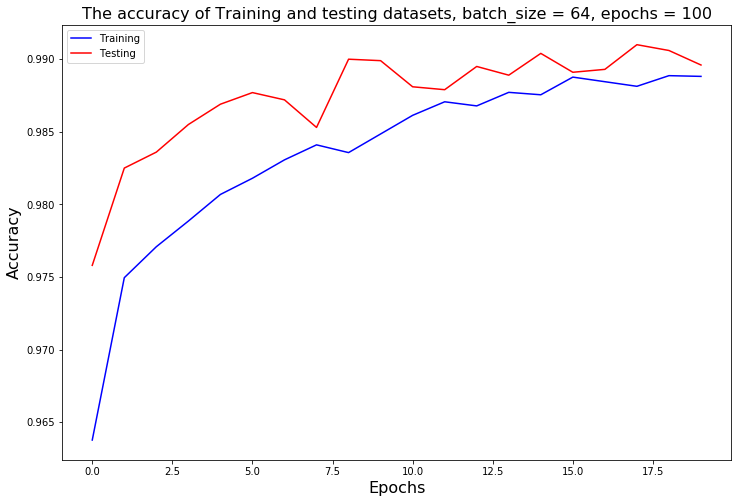

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(history_9.history["acc"], color = "b")
plt.plot(history_9.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets, batch_size = 64, epochs = 100", size = 16)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 调参 9： batch size, 跟多多次迭代

In [0]:
history_10 = model.fit(x_train, y_train, 
                   batch_size = 64, 
                   epochs = 50,
                   validation_data = (x_test, y_test))
score = model.evaluate(x_train, y_train)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test, y_test)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 24s 396us/step - loss: 0.0424 - acc: 0.9901 - val_loss: 0.0422 - val_acc: 0.9918
Epoch 2/50
60000/60000 [==============================] - 23s 388us/step - loss: 0.0363 - acc: 0.9912 - val_loss: 0.0491 - val_acc: 0.9899
Epoch 3/50
60000/60000 [==============================] - 23s 388us/step - loss: 0.0408 - acc: 0.9901 - val_loss: 0.0525 - val_acc: 0.9899
Epoch 4/50
60000/60000 [==============================] - 23s 387us/step - loss: 0.0398 - acc: 0.9904 - val_loss: 0.0455 - val_acc: 0.9915
Epoch 5/50
60000/60000 [==============================] - 23s 387us/step - loss: 0.0396 - acc: 0.9905 - val_loss: 0.0497 - val_acc: 0.9908
Epoch 6/50
60000/60000 [==============================] - 23s 390us/step - loss: 0.0370 - acc: 0.9913 - val_loss: 0.0490 - val_acc: 0.9907
Epoch 7/50
60000/60000 [==============================] - 23s 387us/step - loss: 0.0351 - acc: 0.9914 - val_loss: 0.

In [0]:
max(history_10.history["val_acc"])

0.9932

# 线性模型

In [0]:
model = Sequential()
#model.add(Dense(units = input_shape = (28, 28, 1)))
model.add(Dense(10, input_dim=784, activation='sigmoid'))
model.compile(loss = 'mean_squared_error', optimizer = adam(), metrics = ["accuracy"]) # 'sgd'
#SGD(lr=0.01, momentum=0.9, nesterov=True)
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
x_train_new = x_train[:].reshape((-1, 28 * 28))
y_train_new = y_train[:]
x_test_new = x_test[:].reshape((-1, 28 * 28))
y_test_new = y_test[:]

In [0]:
history_linear = model.fit(x_train_new, y_train_new, 
                   batch_size = 64, 
                   epochs = 20,
                   validation_data = (x_test_new, y_test_new))
score = model.evaluate(x_train_new, y_train_new)
print("Train score: {}".format(score[1]))


score = model.evaluate(x_test_new, y_test_new)
print("Test score: {}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0398 - acc: 0.7960 - val_loss: 0.0233 - val_acc: 0.8952
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0219 - acc: 0.8948 - val_loss: 0.0194 - val_acc: 0.9061
Epoch 3/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0194 - acc: 0.9042 - val_loss: 0.0179 - val_acc: 0.9119
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0181 - acc: 0.9086 - val_loss: 0.0170 - val_acc: 0.9158
Epoch 5/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0173 - acc: 0.9124 - val_loss: 0.0164 - val_acc: 0.9188
Epoch 6/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0168 - acc: 0.9146 - val_loss: 0.0159 - val_acc: 0.9202
Epoch 7/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0164 - acc: 0.9168 - val_loss: 0.0157 - val_acc

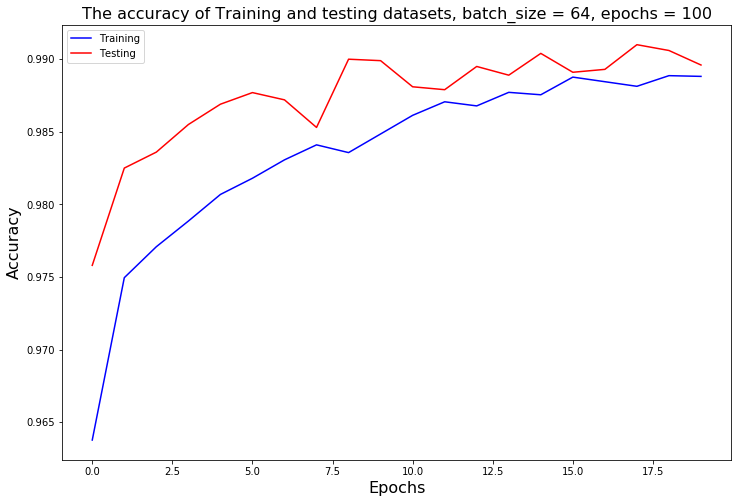

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(history_9.history["acc"], color = "b")
plt.plot(history_9.history["val_acc"], color = "r")
plt.title("The accuracy of Training and testing datasets, batch_size = 64, epochs = 100", size = 16)
plt.xlabel("Epochs", size = 16)
plt.ylabel("Accuracy", size = 16)
plt.legend(["Training","Testing"])
plt.show()

## 提取线性模型参数

In [0]:
weights, bias = model.get_weights()

In [0]:
weights.shape

(784, 10)

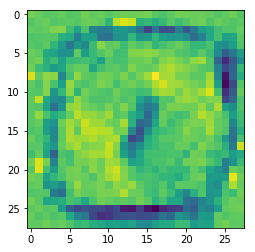

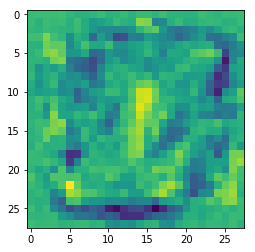

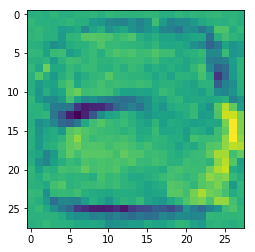

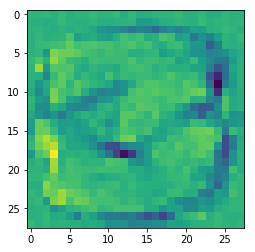

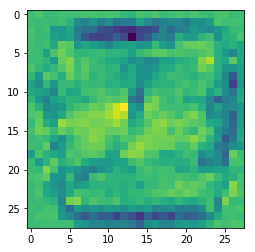

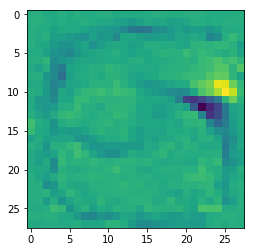

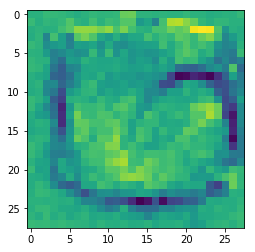

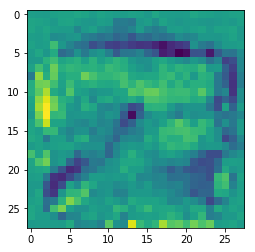

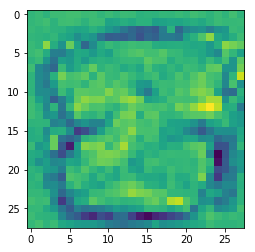

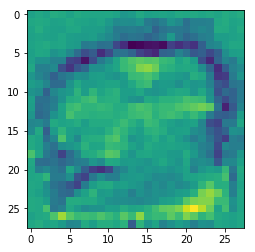

In [0]:
for i in range(10):
  plt.imshow(weights[:, i].reshape(28, 28))
  plt.show()

In [0]:
weights_by_class = []
weights[:, 0]

array([ 7.96114579e-02,  1.82741657e-02, -5.04040532e-02, -3.16032469e-02,
        1.66505277e-02, -6.17902391e-02, -5.10610081e-02,  7.10898563e-02,
       -4.77758795e-03,  3.28558609e-02, -4.50293645e-02, -7.73869455e-04,
        6.44401312e-02,  3.74111459e-02,  6.74584657e-02,  7.90744647e-02,
       -4.11741063e-02, -8.59119296e-02, -2.17607170e-02,  8.35489705e-02,
        5.66439852e-02,  2.93427333e-02,  3.42159048e-02,  4.09484655e-03,
       -7.09564313e-02, -1.12178102e-02,  6.26644269e-02, -7.02398717e-02,
       -7.03331754e-02,  7.35484064e-04,  4.74585816e-02, -7.14592785e-02,
       -3.00862435e-02, -1.38719380e-02, -5.55197075e-02,  2.76541729e-02,
        2.69193072e-02, -2.16838848e-02, -2.72564292e-01,  3.58774960e-01,
        4.77132469e-01,  4.05680090e-01, -2.99011528e-01, -2.36639798e-01,
       -3.64648581e-01, -2.17890620e-01, -5.18180057e-02, -1.69007197e-01,
       -6.99826628e-02,  3.23480926e-02,  4.84084450e-02, -7.75404721e-02,
        3.62408534e-02, -